<h1 align="center">Capstone Project Walmart Dataset</h1> 



In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from random import gauss
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
import collections
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

 <h2 align=center>Understanding the Data</h2>


In [2]:
# IMPORTING THE DATA 
df = pd.read_csv('/Users/christopherfreyre/Documents/Academy Xi/Capstone_project/Walmart-Capstone-Project/Data/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# COLUMNS
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
# CHECKIGN MIN, MAX, MEAN, STD AND COUNT
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435,6435,6435,6435,6435,6435,6435
mean,23,"1,046,964.88",0.07,60.66,3.36,171.58,8.00
std,12.99,"564,366.62",0.26,18.44,0.46,39.36,1.88
min,1,"209,986.25",0,-2.06,2.47,126.06,3.88
25%,12,"553,350.10",0,47.46,2.93,131.74,6.89
50%,23,"960,746.04",0,62.67,3.44,182.62,7.87
75%,34,"1,420,158.66",0,74.94,3.73,212.74,8.62
max,45,"3,818,686.45",1,100.14,4.47,227.23,14.31


In [6]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,"713,173.95",0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,"733,455.07",0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,"734,464.36",0,54.47,4,192.33,8.67
6433,45,19-10-2012,"718,125.53",0,56.47,3.97,192.33,8.67


In [7]:
# CHECK FOR NULL VALUES

df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

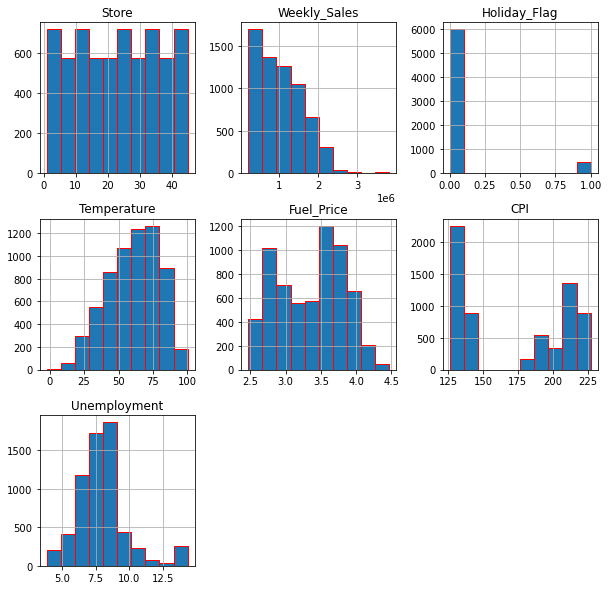

In [8]:
# PLOT DATA HISTOGRAM
df.hist(figsize=(10, 10), edgecolor = 'red')
plt.savefig("hist_gram.png");

 <h3 align=center>Let's look in detail in Store Column</h3>

In [9]:
# UNIQUE STORES

df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

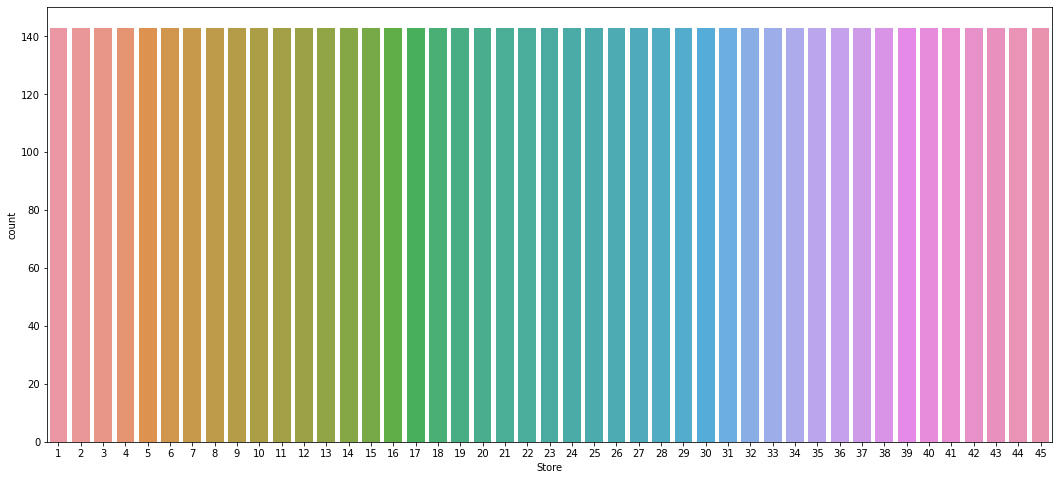

In [10]:
# PLOTING STORES
plt.figure(figsize=(18, 8))
sns.countplot(df['Store']);

### Let's look in detail in Date Column

In [11]:
# AMOUNT OF UNIQUE VALUES IN COLUMN DATE
len(set(df['Date']))

143

In [12]:
# UNIQUE VALUES IN COLUMN DATE
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [13]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,"713,173.95",0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,"733,455.07",0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,"734,464.36",0,54.47,4,192.33,8.67
6433,45,19-10-2012,"718,125.53",0,56.47,3.97,192.33,8.67


In [14]:
# CONVERT TO DATETIME AND ADDING WEEK, MONTH AND YEAR 

df["Date"] = pd.to_datetime(df["Date"]) 


df['Week'] =df['Date'].dt.week
df['Month'] =df['Date'].dt.month
df['Year'] =df['Date'].dt.year

In [15]:
# ADDING QUARTER FOR A FUTURE ANALYSIS

df['Quarter'] = pd.cut(df['Month'], bins=4, labels=('Q1', 'Q2', 'Q3', 'Q4'))
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,17,5,2010,Q2
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,48,12,2010,Q4
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,7,2,2010,Q1
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,8,2,2010,Q1
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,18,5,2010,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,173.95",0,64.88,4.00,192.01,8.68,39,9,2012,Q3
6431,45,2012-05-10,"733,455.07",0,64.89,3.98,192.17,8.67,19,5,2012,Q2
6432,45,2012-12-10,"734,464.36",0,54.47,4,192.33,8.67,50,12,2012,Q4
6433,45,2012-10-19,"718,125.53",0,56.47,3.97,192.33,8.67,42,10,2012,Q4


In [16]:
# GROUPING BY QUARTER, MONTH, YEAR INTERM OF WEEKLY SALES FOR BEST UNDERSTANDING OF WEEKLY SALES

df.groupby(['Quarter', 'Month', 'Year'])['Weekly_Sales'].describe()

count         mean        std        min        25%  \
Quarter Month Year                                                        
Q1      1     2010     45   938,663.91 484,365.60 224,294.39 495,692.19   
              2011    225   942,069.73 491,396.38 226,702.36 520,962.14   
              2012    180   956,781.66 499,056.45 236,920.49 540,523.15   
        2     2010    180 1,064,371.56 570,205.70 267,495.76 541,846.73   
              2011    180 1,042,273.35 551,852.83 220,060.35 547,345.78   
              2012    135 1,057,997.03 563,113.52 242,526.70 563,941.47   
        3     2010    180 1,034,590.12 546,689.83 209,986.25 539,757.18   
              2011    135 1,011,263.11 529,566.00 238,084.08 543,702.33   
              2012    225 1,025,509.64 533,836.40 246,970.97 561,226.38   
Q2      4     2010    180 1,021,176.61 537,991.07 263,263.02 517,462.08   
              2011    270 1,033,219.67 550,147.04 234,218.03 556,081.91   
              2012    180 1,014,126.60 526,976.31 249,798.75 533,287.29   
        5     2010    270 1,039,303.27 550,399.07 246,124.61 535,317.61   
              2011    180 1,015,564.82 528,298.05 239,206.26 550,439.48   
              2012    135 1,053,948.46 547,972.13 261,851.74 548,445.83   
        6     2010    135 1,055,082.09 545,621.99 259,419.91 556,223.30   
              2011    135 1,038,471.22 537,601.47 238,172.66 563,888.08   
              2012    270 1,082,919.51 561,110.36 244,338.31 608,049.55   
Q3      7     2010    180 1,023,701.98 531,266.55 242,047.03 561,684.57   
              2011    225   997,604.85 514,120.52 224,806.96 558,794.63   
              2012    180 1,025,480.50 522,417.57 249,134.32 568,206.87   
        8     2010    180 1,025,211.59 531,583.22 224,031.19 545,264.09   
              2011    180 1,044,894.59 545,600.86 237,095.82 561,612.71   
              2012    180 1,064,514.37 549,336.26 237,129.81 581,828.61   
        9     2010    180   998,355.89 518,390.43 231,976.84 534,999.76   
              2011    225 1,026,810.06 555,241.82 229,731.98 545,052.34   
              2012    180   998,866.33 513,960.31 242,813.51 530,119.97   
Q4      10    2010    225 1,027,200.63 553,366.45 213,538.32 537,518.57   
              2011    180 1,020,662.94 531,177.58 231,319.96 555,325.49   
              2012    180 1,044,885.48 546,489.08 253,731.13 553,519.91   
        11    2010    135 1,176,097.29 671,476.59 224,639.76 577,517.59   
              2011    225 1,126,534.77 633,201.93 251,294.50 567,673.87   
              2012     45 1,042,797.31 545,239.96 295,841.84 579,539.95   
        12    2010    270 1,198,413.37 745,002.68 219,804.85 576,451.52   
              2011    180 1,274,310.93 772,447.47 215,359.21 650,203.17   
              2012     45 1,025,078.09 530,383.22 291,781.15 551,799.63   

                            50%          75%          max  
Quarter Month Year                                         
Q1      1     2010   865,709.11 1,215,273.20 1,933,719.21  
              2011   836,717.75 1,297,472.06 2,074,668.19  
              2012   860,695.25 1,319,569.60 2,179,360.94  
        2     2010   990,204.67 1,450,643.35 2,495,630.51  
              2011   962,996.35 1,456,917.75 2,316,495.56  
              2012   955,641.74 1,433,132.33 2,427,640.17  
        3     2010   974,270.84 1,386,499.46 2,416,051.17  
              2011   929,222.16 1,397,796.47 2,182,246.69  
              2012   939,158.25 1,396,150.15 2,214,967.44  
Q2      4     2010   962,206.46 1,392,522.64 2,363,601.47  
              2011   945,852.07 1,425,440.61 2,351,143.07  
              2012   938,175.17 1,394,694.82 2,196,968.33  
        5     2010   973,124.46 1,387,761.85 2,623,469.95  
              2011   941,774.14 1,402,475.00 2,189,353.63  
              2012   986,612.02 1,452,207.43 2,246,411.89  
        6     2010   976,242.09 1,416,108.98 2,248,645.59  
              2011   977,103.64 1,426,504.90 2,141,210.62  
              2012   994,524.

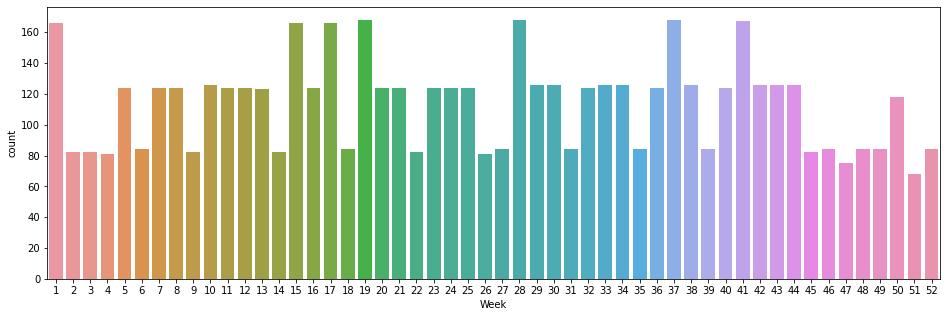

In [144]:
# PLOTING WEEKS
plt.figure(figsize=(16,5))
sns.countplot(df['Week'])
plt.savefig("week.png");

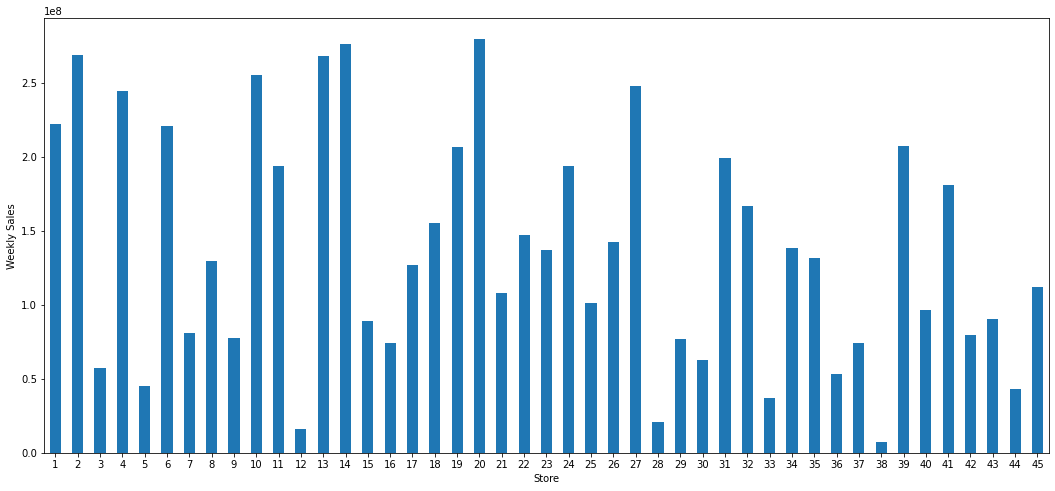

In [145]:
# PLOTING STORES VS WEEKLY SALES

stores = df.groupby('Store')['Weekly_Sales'].sum()

plt.figure(figsize=(18,8))
stores.plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Weekly Sales')
plt.savefig("sales_vs_store.png");

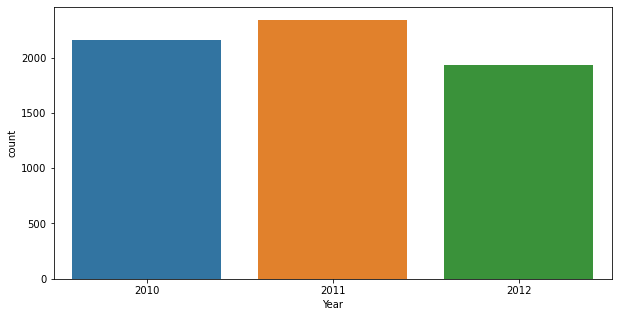

In [18]:
# PLOTING YEARS
plt.figure(figsize=(10,5))
sns.countplot(df['Year'])
plt.savefig("years.png");

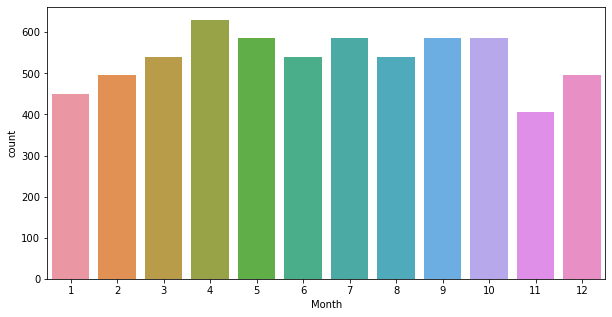

In [19]:
# PLOTING MONTHS
plt.figure(figsize=(10,5))
sns.countplot(df['Month'])
plt.savefig("months.png");

 <h3 align=center> Let's look in detail in Weekly Sales Column</h3>

In [20]:
df[['Weekly_Sales']].describe()

,Weekly_Sales
count,6435
mean,"1,046,964.88"
std,"564,366.62"
min,"209,986.25"
25%,"553,350.10"
50%,"960,746.04"
75%,"1,420,158.66"
max,"3,818,686.45"


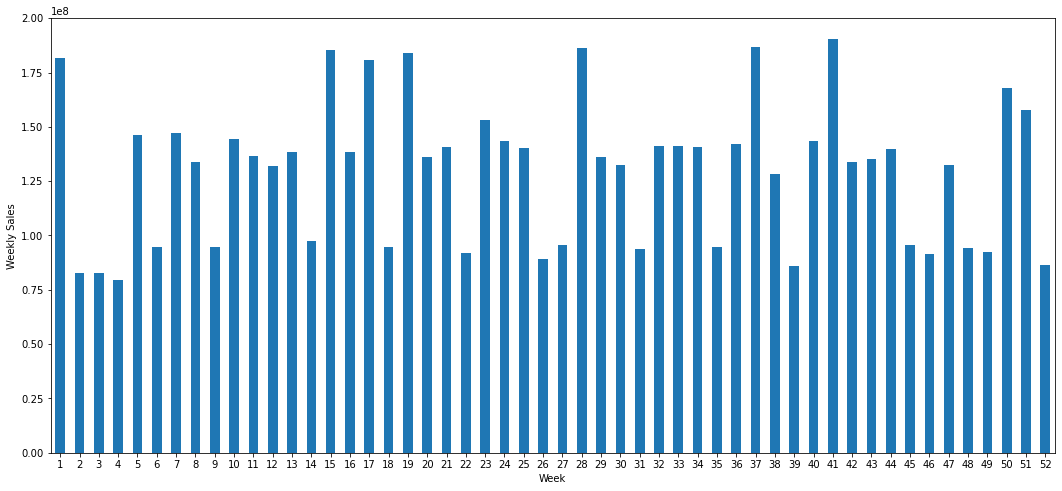

In [21]:
# PLOTING WEEKS VS WEEKLY SALES

week = df.groupby('Week')['Weekly_Sales'].sum()

plt.figure(figsize=(18,8))
week.plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Weekly Sales');

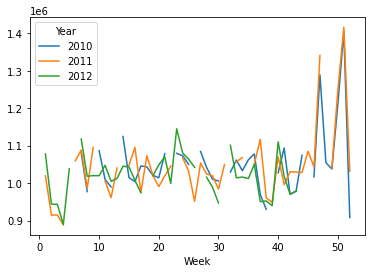

In [149]:
# PLOTING WEEKLY SALES IN TERMS OF YEARS


weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")

weekly_sales.plot()
plt.savefig("annual_sales.png");


 <h3 align=center> Let's look in detail in Holiday Flag Column</h3>

In [23]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,17,5,2010,Q2
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,48,12,2010,Q4
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,7,2,2010,Q1
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,8,2,2010,Q1
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,18,5,2010,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,173.95",0,64.88,4.00,192.01,8.68,39,9,2012,Q3
6431,45,2012-05-10,"733,455.07",0,64.89,3.98,192.17,8.67,19,5,2012,Q2
6432,45,2012-12-10,"734,464.36",0,54.47,4,192.33,8.67,50,12,2012,Q4
6433,45,2012-10-19,"718,125.53",0,56.47,3.97,192.33,8.67,42,10,2012,Q4


In [24]:
# UNIQUE VALUES IN COLUMN HOLIDAY_FLAG
df['Holiday_Flag'].unique()

array([0, 1])

In [150]:
# COUNT THE FREQUENCY OF VALUES IN HOLIDAY_FLAG

counter = collections.Counter(df['Holiday_Flag'])

print(f'None Hoilday and Holiday frequency:{counter}\n')
print(f" Total frequency: {len(df['Holiday_Flag'])}")


None Hoilday and Holiday frequency:Counter({0: 5508, 1: 409})

 Total frequency: 5917


In [26]:
# HOLIDAY DAYS OF THE DATASET

df_holiday = df.loc[df['Holiday_Flag']==1]
df_holiday['Date'].unique() 


array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

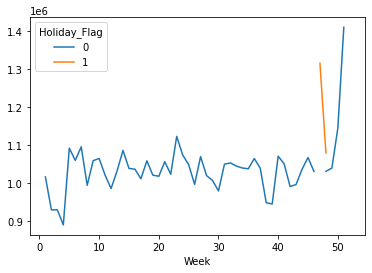

In [131]:
# PLOTING WEEKLY SALES IN TERMS OF HOLIDAY FLAG


Holidays = pd.pivot_table(df, values = "Weekly_Sales", columns = "Holiday_Flag", index = "Week")
Holidays.plot();


<h2 align="center">Checking for Outliers</h2> 

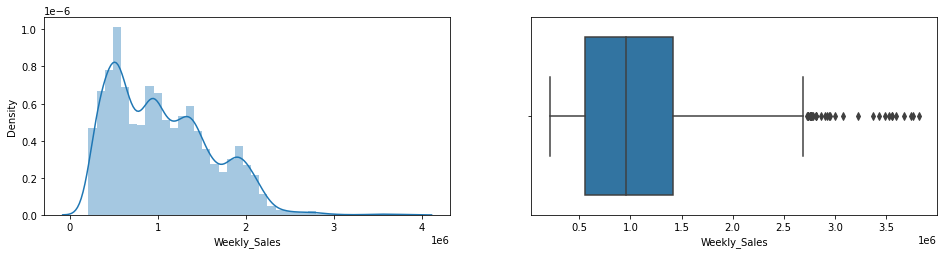

In [27]:
# PLOTING WEEKLY_SALES

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Weekly_Sales'])
plt.subplot(2,2,2)
sns.boxplot(df['Weekly_Sales'])
plt.savefig("Outliers_sales.png");



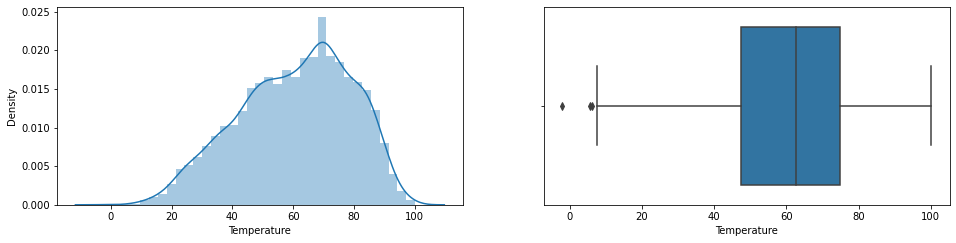

In [28]:
# PLOTING TEMPERATURE

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Temperature'])
plt.subplot(2,2,2)
sns.boxplot(df['Temperature']);

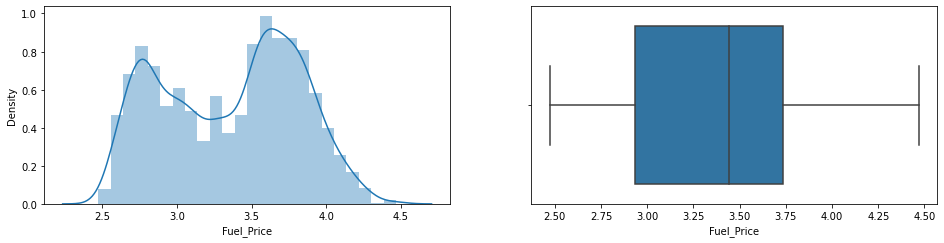

In [29]:
# PLOTING Fuel_Price

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fuel_Price'])
plt.subplot(2,2,2)
sns.boxplot(df['Fuel_Price']);

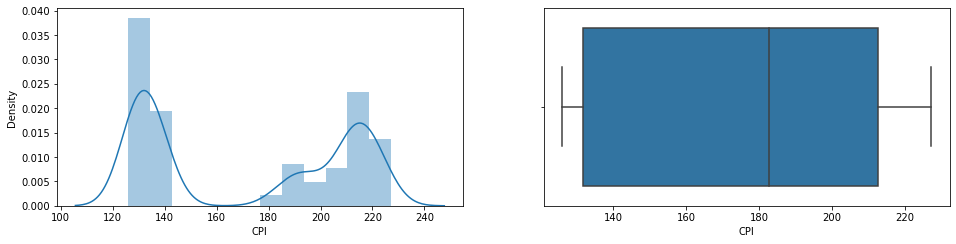

In [30]:
# PLOTING CPI

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CPI'])
plt.subplot(2,2,2)
sns.boxplot(df['CPI']);

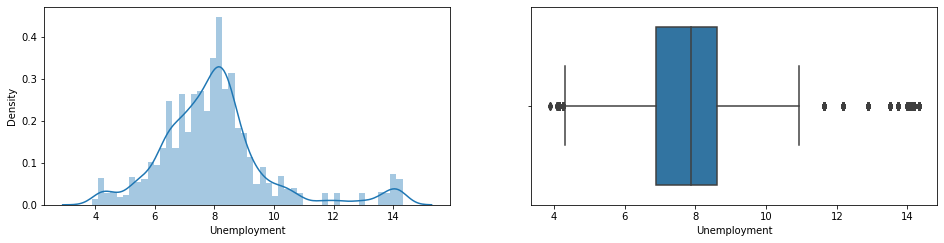

In [31]:
# PLOTING Unemployment

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Unemployment'])
plt.subplot(2,2,2)
sns.boxplot(df['Unemployment']);

**Outliers located in:** 

                        * Weekly Sales
                        * Temperature
                        * Unemployment

### INTER QUANTILE RANGE Triming Method (IQR)

In [32]:
# DEFINING 

def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [33]:
# IQR (INTER QUANTILE RANGE) FT(FEATURE) 
# REMOVING OUTLIERS FOR ONLY WEEKLY SALES, TEMPERATURE AND UNEMPLOYMENT

def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    
    lowest_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    ls = df.index[(df[ft] < lowest_bound) | (df[ft] > upper_bound)]
    
    return ls
    

In [34]:

index_list = []

for feature in ['Weekly_Sales', 'Temperature','Unemployment']:
    index_list.extend(outliers(df, feature))

In [35]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [36]:
df = remove(df, index_list)

In [37]:
# OUTLIERS DELETED CHECKED BY REDUCTION OF SHAPE

df.shape

(5917, 12)

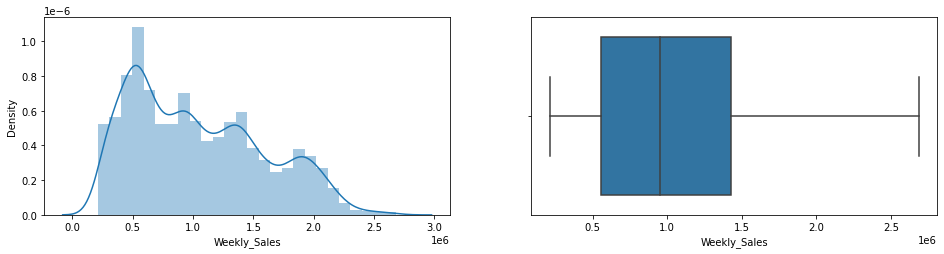

In [38]:
# PLOTING WEEKLY_SALES WITH NO OUTLIERS

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Weekly_Sales'])
plt.subplot(2,2,2)
sns.boxplot(df['Weekly_Sales']);



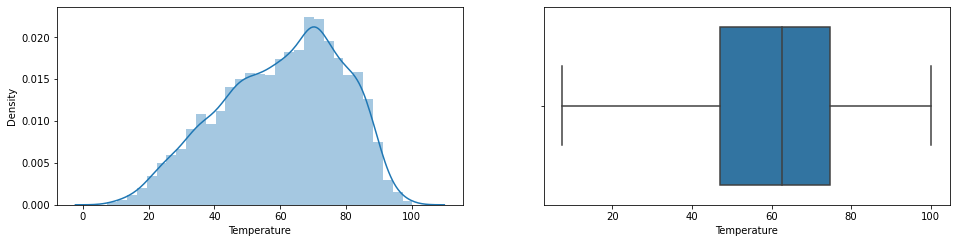

In [39]:
# PLOTING TEMPERATURE WITH NO OUTLIERS

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Temperature'])
plt.subplot(2,2,2)
sns.boxplot(df['Temperature']);

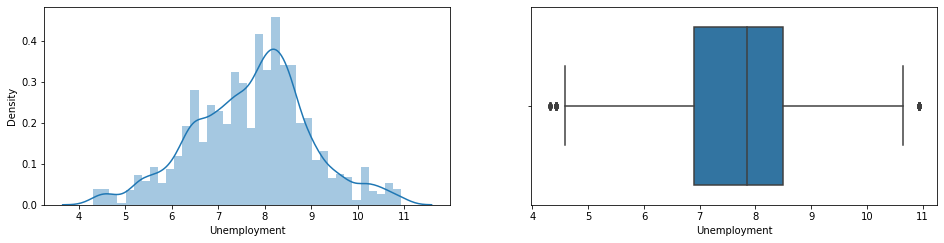

In [40]:
# PLOTING Unemployment 

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Unemployment'])
plt.subplot(2,2,2)
sns.boxplot(df['Unemployment']);

In [41]:
df.shape

(5917, 12)

**IMPORTANT:** We still have outliers in the Unemployment column so I will use the IQR Capping method to get rid of them.

### IQR Capping method

In [42]:
# USING IQR CAPPING METHOD IN UNEMPLOYMENT 

q1 = df['Unemployment'].quantile(0.25)
q3 = df['Unemployment'].quantile(0.75)
iqr = q3 - q1


upper_limit = q3 + (1.5 * iqr)
lowest_limit = q1 - (1.5 * iqr)


df.loc[(df['Unemployment'] > upper_limit) | (df['Unemployment'] < lowest_limit)]



df.loc[(df['Unemployment']> upper_limit), 'Unemployment'] = upper_limit 
df.loc[(df['Unemployment']< lowest_limit), 'Unemployment'] = lowest_limit 

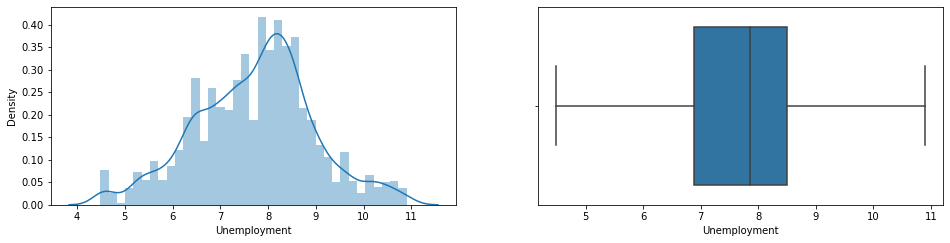

In [43]:
# PLOTING UNEMPLOYMENT WITH NO OUTLIERS

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Unemployment'])
plt.subplot(2,2,2)
sns.boxplot(df['Unemployment']);

In [44]:
df.shape

(5917, 12)

<h1 align="center">Baseline Model</h1> 

In [45]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Month', 'Year',
       'Quarter'],
      dtype='object')

In [46]:
# BASELINE MODEL 

outcome = 'Weekly_Sales'
x_cols = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
baseline_model = ols(formula=formula, data=df).fit()


baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          9.40e-171
Time:                        11:54:37   Log-Likelihood:                -86220.
No. Observations:                5917   AIC:                         1.725e+05
Df Residuals:                    5909   BIC:                         1.725e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.653e+07   2.96e+07      3.261      0.001    3.85e+07    1.55e+08
Store        -1.483e+04    546.593    -27.138      0.000   -1.59e+04   -1.38e+04
Holiday_Flag  5.286e+04   2.68e+04      1.971      0.049     293.117    1.05e+05
Temperature   -697.7306    389.423     -1.792      0.073   -1461.141      65.680
Fuel_Price    9.074e+04   2.57e+04      3.528      0.000    4.03e+04    1.41e+05
CPI          -1906.5631    196.330     -9.711      0.000   -2291.442   -1521.684
Unemployment  -569.9591   5975.326     -0.095      0.924   -1.23e+04    1.11e+04
Year         -4.728e+04   1.48e+04     -3.205      0.001   -7.62e+04   -1.84e+04
==============================================================================
Omnibus:                      334.047   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.340
Skew:                           0.272   Prob(JB):                     2.54e-40
Kurtosis:                       2.334   Cond. No.                     8.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

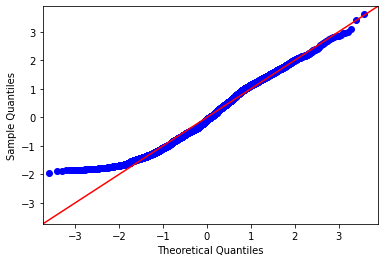

In [47]:
residuals = baseline_model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

**IMPORTANT:** Poor model in terms of R-squared value which needs improvement

In [48]:
df1 = df.copy()

In [49]:
# DROPPING DATE AND QUARTER

df1.drop(columns= ['Date', 'Quarter'], inplace=True)

In [50]:
# ADDING DUMMIES FOR STORE, WEEK, MONTH, YEAR AND HOLIDAY FLAG

df_dummies = pd.get_dummies(df1, columns=['Store', 'Week', 'Month', 'Year', 'Holiday_Flag'])
df_dummies

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
0,"1,643,690.90",42.31,2.57,211.10,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,"1,641,957.44",38.51,2.55,211.24,8.11,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,"1,611,968.17",39.93,2.51,211.29,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,"1,409,727.59",46.63,2.56,211.32,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,"1,554,806.68",46.50,2.62,211.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,"713,173.95",64.88,4.00,192.01,8.68,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6431,"733,455.07",64.89,3.98,192.17,8.67,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6432,"734,464.36",54.47,4,192.33,8.67,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
6433,"718,125.53",56.47,3.97,192.33,8.67,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


<h1 align="center">Model 1</h1> 

In [51]:
# MODEL 1 WITH DUMMIES

outcome = 'Weekly_Sales'
x_cols =  ['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
          'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16',
          'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24',
          'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
          'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40',
          'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 
          'Holiday_Flag_0', 'Holiday_Flag_1','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year_2010',
          'Year_2011', 'Year_2012', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
          'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_1 = ols(formula=formula, data=df_dummies).fit()


model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1682.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:37   Log-Likelihood:                -77943.
No. Observations:                5917   AIC:                         1.560e+05
Df Residuals:                    5854   BIC:                         1.564e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.542e+05   1.16e+05     -2.183      0.029   -4.83e+05   -2.59e+04
Store_1          529.6351   6.03e+04      0.009      0.993   -1.18e+05    1.19e+05
Store_2         3.572e+05   5.99e+04      5.967      0.000     2.4e+05    4.75e+05
Store_3        -1.209e+06   6.44e+04    -18.784      0.000   -1.34e+06   -1.08e+06
Store_4         1.394e+06   5.44e+04     25.630      0.000    1.29e+06     1.5e+06
Store_5        -1.305e+06   6.08e+04    -21.460      0.000   -1.42e+06   -1.19e+06
Store_6        -6.204e+04   6.21e+04     -1.000      0.318   -1.84e+05    5.96e+04
Store_7        -6.984e+05   3.38e+04    -20.631      0.000   -7.65e+05   -6.32e+05
Store_8        -7.587e+05   6.46e+04    -11.747      0.000   -8.85e+05   -6.32e+05
Store_9        -1.123e+06   6.47e+04    -17.360      0.000   -1.25e+06   -9.96e+05
Store_10        1.317e+06   5.36e+04     24.549      0.000    1.21e+06    1.42e+06
Store_11       -2.554e+05   6.44e+04     -3.968      0.000   -3.82e+05   -1.29e+05
Store_12        5.977e+05   6.43e+04      9.298      0.000    4.72e+05    7.24e+05
Store_13        1.353e+06   5.37e+04     25.176      0.000    1.25e+06    1.46e+06
Store_14        8.128e+05   2.48e+04     32.837      0.000    7.64e+05    8.61e+05
Store_15       -1.363e+04   4.52e+04     -0.301      0.763   -1.02e+05     7.5e+04
Store_16       -8.474e+05   3.32e+04    -25.517      0.000   -9.13e+05   -7.82e+05
Store_17        2.577e+05   5.39e+04      4.784      0.000    1.52e+05    3.63e+05
Store_18        4.888e+05    4.5e+04     10.857      0.000    4.01e+05    5.77e+05
Store_19        8.082e+05   4.52e+04     17.873      0.000     7.2e+05    8.97e+05
Store_20        5.707e+05   5.18e+04     11.023      0.000    4.69e+05    6.72e+05
Store_21       -7.939e+05   5.98e+04    -13.265      0.000   -9.11e+05   -6.77e+05
Store_22        3.528e+05   4.03e+04      8.756      0.000    2.74e+05    4.32e+05
Store_23          5.9e+05   4.82e+04     12.246      0.000    4.96e+05    6.84e+05
Store_24         7.42e+05   4.51e+04     16.435      0.000    6.53e+05     8.3e+05
Store_25       -7.882e+05   5.18e+04    -15.206      0.000    -8.9e+05   -6.87e+05
Store_26        3.584e+05    4.5e+04      7.957      0.000     2.7e+05    4.47e+05
Store_27        1.082e+06   4.05e+04     26.733      0.000       1e+06    1.16e+06
Store_28        8.754e+05   6.43e+04     13.617      0.000    7.49e+05       1e+06
Store_29           -1e+04   4.53e+04     -0.221      0.825   -9.89e+04    7.89e+04
Store_30       -1.111e+06   5.98e+04    -18.570      0.000   -1.23e+06   -9.94e+05
Store_31       -1.541e+05   5.98e+04     -2.574      0.010   -2.71e+05   -3.67e+04
Store_32       -9.743e+04   3.35e+04     -2.912      0.004   -1.63e+05   -3.18e+04
Store_33       -2.705e+05   5.37e+04     -5.041      0.000   -3.76e+05   -1.65e+05
Store_34    

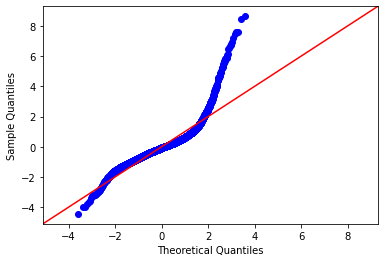

In [52]:
residuals = model_1.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [53]:
# SELECTING 'X' AND 'Y' VALUES FOR TRAIN-TEST SPLIT
X = df_dummies.drop('Weekly_Sales', axis=1)
y = df_dummies['Weekly_Sales']

df_dummies

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
0,"1,643,690.90",42.31,2.57,211.10,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,"1,641,957.44",38.51,2.55,211.24,8.11,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,"1,611,968.17",39.93,2.51,211.29,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,"1,409,727.59",46.63,2.56,211.32,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,"1,554,806.68",46.50,2.62,211.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,"713,173.95",64.88,4.00,192.01,8.68,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6431,"733,455.07",64.89,3.98,192.17,8.67,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6432,"734,464.36",54.47,4,192.33,8.67,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
6433,"718,125.53",56.47,3.97,192.33,8.67,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [54]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [55]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 10777956584.190792
Test Mean Squared Error: 10381913197.903303


In [56]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

7.472014847773431e+29

**IMPORTANT:** Improvement in the R-squared value, but it still needs to be fixed since the rest of the values seem unsatisfactory. 

<h2 align="center">Logarithmic Transformation</h2> 

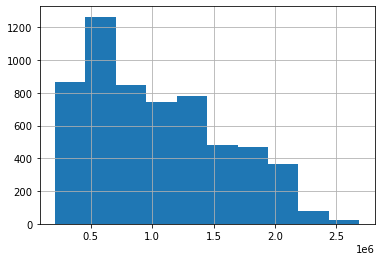

In [57]:
# PLOTING WEEKLY SALES 
df_dummies['Weekly_Sales'].hist();

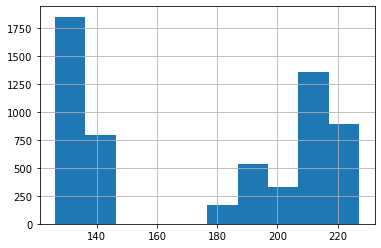

In [58]:
# PLOTING CPI
df_dummies['CPI'].hist();

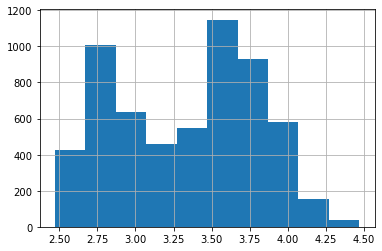

In [59]:
# PLOTING FUEL PRICES
df_dummies['Fuel_Price'].hist();

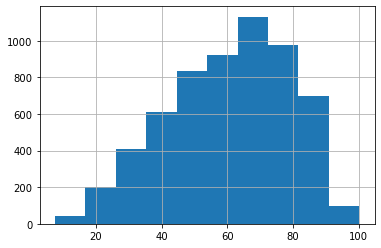

In [60]:
# PLOTING TEMPERATURE

df_dummies['Temperature'].hist();

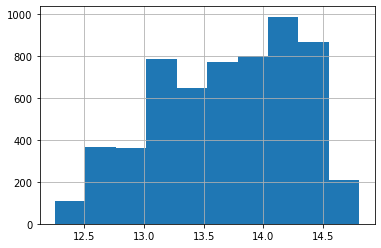

In [61]:
# PERFORMING LOG TRANSFORMATION IN WEEKLY SALE, CPI AND FUEL PRICES

df_dummies['Weekly_Sales'] = np.log(df_dummies['Weekly_Sales'])
df_dummies['CPI'] = np.log(df_dummies['CPI'])
df_dummies['Fuel_Price'] = np.log(df_dummies['Fuel_Price'])

# PLOTING WEEKLY SALES LOG TRANSFORMATION
df_dummies['Weekly_Sales'].hist();

**Took off columns that provided a high p value:** 

                * Store: 1, 15, 29 and 42.
                * Fuel price

<h1 align="center">Model 2</h1> 

In [62]:
# MODEL 2
outcome = 'Weekly_Sales'
x_cols =  ['Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
          'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_16',
          'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24',
          'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_30', 'Store_31', 'Store_32',
          'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40',
          'Store_41', 'Store_43', 'Store_44', 'Store_45', 
          'Holiday_Flag_0', 'Holiday_Flag_1', 'Temperature', 'CPI', 'Unemployment',
          'Year_2011', 'Year_2012', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
           'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_2 = ols(formula=formula, data=df_dummies).fit()


model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2827.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:38   Log-Likelihood:                 4726.6
No. Observations:                5917   AIC:                            -9335.
Df Residuals:                    5858   BIC:                            -8941.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5689      0.080     32.061      0.000       2.412       2.726
Store_2            0.2111      0.013     16.334      0.000       0.186       0.236
Store_3           -1.4000      0.013   -106.172      0.000      -1.426      -1.374
Store_4            1.2341      0.014     85.614      0.000       1.206       1.262
Store_5           -1.6489      0.014   -120.501      0.000      -1.676      -1.622
Store_6           -0.0561      0.013     -4.172      0.000      -0.082      -0.030
Store_7           -0.7597      0.012    -62.203      0.000      -0.784      -0.736
Store_8           -0.6340      0.014    -45.009      0.000      -0.662      -0.606
Store_9           -1.1491      0.014    -81.767      0.000      -1.177      -1.122
Store_10           1.2341      0.011    111.421      0.000       1.212       1.256
Store_11          -0.1858      0.013    -14.089      0.000      -0.212      -0.160
Store_12           0.7246      0.029     25.258      0.000       0.668       0.781
Store_13           1.2311      0.012     98.724      0.000       1.207       1.256
Store_14           0.5822      0.012     50.165      0.000       0.559       0.605
Store_16          -0.9386      0.013    -73.247      0.000      -0.964      -0.913
Store_17           0.4156      0.013     31.376      0.000       0.390       0.442
Store_18           0.6106      0.011     58.073      0.000       0.590       0.631
Store_19           0.8655      0.011     80.377      0.000       0.844       0.887
Store_20           0.3417      0.013     26.739      0.000       0.317       0.367
Store_21          -0.7220      0.013    -56.060      0.000      -0.747      -0.697
Store_22           0.4699      0.011     44.558      0.000       0.449       0.491
Store_23           0.6779      0.018     38.059      0.000       0.643       0.713
Store_24           0.8226      0.011     78.126      0.000       0.802       0.843
Store_25          -0.7398      0.013    -58.396      0.000      -0.765      -0.715
Store_26           0.4964      0.011     45.041      0.000       0.475       0.518
Store_27           1.0090      0.011     94.960      0.000       0.988       1.030
Store_28           0.9742      0.029     33.959      0.000       0.918       1.030
Store_30          -1.2571      0.013    -97.605      0.000      -1.282      -1.232
Store_31          -0.1015      0.013     -7.879      0.000      -0.127      -0.076
Store_32          -0.0313      0.012     -2.621      0.009      -0.055      -0.008
Store_33          -0.7263      0.011    -66.268      0.000      -0.748      -0.705
Store_34           0.6459      0.011     56.558      0.000       0.624       0.668
Store_35           0.3766      0.010     36.277      0.000       0.356       0.397
Store_36          -1.4103      0.013   -109.757      0.000      -1.435      -1.385
Store_37    

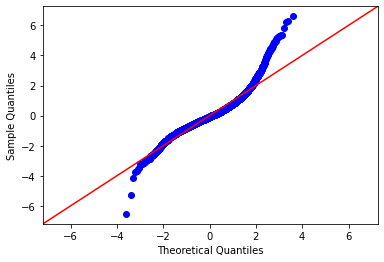

In [63]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [64]:
# SELECTING 'X' AND 'Y' VALUES FOR TRAIN-TEST SPLIT
X2 = df_dummies.drop('Weekly_Sales', axis=1)
y2 = df_dummies['Weekly_Sales']

df_dummies

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
0,14.31,42.31,0.94,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,14.31,38.51,0.94,5.35,8.11,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,14.29,39.93,0.92,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,14.16,46.63,0.94,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,14.26,46.50,0.97,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,13.48,64.88,1.39,5.26,8.68,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6431,13.51,64.89,1.38,5.26,8.67,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6432,13.51,54.47,1.39,5.26,8.67,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
6433,13.48,56.47,1.38,5.26,8.67,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [65]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [66]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.007968925224859862
Test Mean Squared Error: 0.007505337133360181


In [67]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X2, y2, cv=5, scoring=mse)
cv_5_results.mean()

3.1976644519253446e+17

<h1 align="center">Model 3</h1> 

In [68]:
df_final = df_dummies.copy()

In [69]:
df_final.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       ...
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010',
       'Year_2011', 'Year_2012', 'Holiday_Flag_0', 'Holiday_Flag_1'],
      dtype='object', length=119)

In [70]:
sales_preds = df_final.drop('Weekly_Sales', axis=1)
sales_target = df_final['Weekly_Sales']
sales_preds.head()

,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
0,42.31,0.94,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38.51,0.94,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,39.93,0.92,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,46.63,0.94,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,46.50,0.97,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [71]:
predictors = sm.add_constant(sales_preds)
predictors

,const,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
0,1,42.31,0.94,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,38.51,0.94,5.35,8.11,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,1,39.93,0.92,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,46.63,0.94,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,46.50,0.97,5.35,8.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,1,64.88,1.39,5.26,8.68,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6431,1,64.89,1.38,5.26,8.67,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6432,1,54.47,1.39,5.26,8.67,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
6433,1,56.47,1.38,5.26,8.67,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [72]:
predictors.drop(columns= ['Store_1', 'Store_15', 'Store_29','Store_42', 'Fuel_Price'], inplace=True)

In [73]:
model_3 = sm.OLS(sales_target, predictors).fit()

In [74]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2399.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:39   Log-Likelihood:                 5898.9
No. Observations:                5917   AIC:                        -1.159e+04
Df Residuals:                    5814   BIC:                        -1.090e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.0484      0.054     38.018      0.000       1.943       2.154
Temperature       -0.0002      0.000     -1.643      0.100      -0.000    3.91e-05
CPI                1.9729      0.019    104.555      0.000       1.936       2.010
Unemployment      -0.0399      0.003    -14.297      0.000      -0.045      -0.034
Store_2            0.2186      0.011     20.525      0.000       0.198       0.239
Store_3           -1.3959      0.011   -128.300      0.000      -1.417      -1.375
Store_4            1.2522      0.012    104.926      0.000       1.229       1.276
Store_5           -1.6420      0.011   -145.234      0.000      -1.664      -1.620
Store_6           -0.0477      0.011     -4.299      0.000      -0.070      -0.026
Store_7           -0.7631      0.010    -74.360      0.000      -0.783      -0.743
Store_8           -0.6272      0.012    -53.901      0.000      -0.650      -0.604
Store_9           -1.1418      0.012    -98.331      0.000      -1.165      -1.119
Store_10           1.2447      0.009    135.648      0.000       1.227       1.263
Store_11          -0.1815      0.011    -16.674      0.000      -0.203      -0.160
Store_12           0.7183      0.024     30.265      0.000       0.672       0.765
Store_13           1.2445      0.010    120.760      0.000       1.224       1.265
Store_14           0.5874      0.010     61.365      0.000       0.569       0.606
Store_16          -0.9347      0.011    -87.472      0.000      -0.956      -0.914
Store_17           0.4204      0.011     38.249      0.000       0.399       0.442
Store_18           0.6086      0.009     70.119      0.000       0.592       0.626
Store_19           0.8662      0.009     97.398      0.000       0.849       0.884
Store_20           0.3529      0.011     33.418      0.000       0.332       0.374
Store_21          -0.7195      0.011    -67.801      0.000      -0.740      -0.699
Store_22           0.4705      0.009     54.099      0.000       0.453       0.488
Store_23           0.6916      0.015     46.809      0.000       0.663       0.721
Store_24           0.8220      0.009     94.633      0.000       0.805       0.839
Store_25          -0.7383      0.010    -70.382      0.000      -0.759      -0.718
Store_26           0.4961      0.009     54.047      0.000       0.478       0.514
Store_27           1.0152      0.009    115.928      0.000       0.998       1.032
Store_28           0.9679      0.024     40.782      0.000       0.921       1.014
Store_30          -1.2546      0.011   -118.219      0.000      -1.275      -1.234
Store_31          -0.0990      0.011     -9.328      0.000      -0.120      -0.078
Store_32          -0.0335      0.010     -3.389      0.001      -0.053      -0.014
Store_33          -0.7245      0.009    -79.400      0.000      -0.742      -0.707
Store_34    

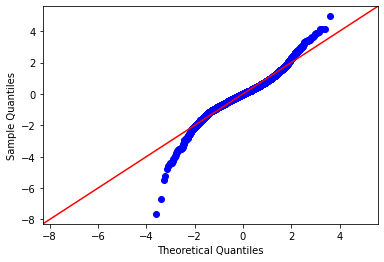

In [75]:
residuals = model_3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [76]:
X3 = sales_preds
y3 = sales_target

In [77]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [78]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.007968925224859862
Test Mean Squared Error: 0.007505337133360181


In [79]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X3, y3, cv=5, scoring=mse)
cv_5_results.mean()

3.1976644519253446e+17

In [80]:
linreg.score(X_train, y_train)

0.9769332667921982

In [81]:
linreg.score(X_test, y_test)

0.9776243100634094

<h1 align="center">Model 4</h1> 

In [82]:
np.std(sales_preds)

Temperature      18.38
Fuel_Price        0.14
CPI               0.23
Unemployment      1.24
Store_1           0.15
                  ... 
Year_2010         0.47
Year_2011         0.48
Year_2012         0.46
Holiday_Flag_0    0.25
Holiday_Flag_1    0.25
Length: 118, dtype: float64

In [83]:
sales_preds = df_final.drop('Weekly_Sales', axis=1)
sales_target = df_final['Weekly_Sales']
sales_preds.head()

,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
0,42.31,0.94,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38.51,0.94,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,39.93,0.92,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,46.63,0.94,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,46.50,0.97,5.35,8.11,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [84]:
# WE INCLUDE ALL THE COLUMNS FOR NOW

sale_scale = (df_final - np.mean(df_final)) / np.std(df_final)
sale_scale.describe()



,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2010,Year_2011,Year_2012,Holiday_Flag_0,Holiday_Flag_1
count,5917,5917,5917,5917,5917,5917,5917,5917,5917,5917,...,5917,5917,5917,5917,5917,5917,5917,5917,5917,5917
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-2.88,-2.08,-1.31,-2.61,-0.16,-0.16,-0.16,-0.14,-0.16,...,-0.30,-0.32,-0.32,-0.26,-0.28,-0.71,-0.76,-0.65,-3.67,-0.27
25%,-0.81,-0.73,-0.96,-1.09,-0.67,-0.16,-0.16,-0.16,-0.14,-0.16,...,-0.30,-0.32,-0.32,-0.26,-0.28,-0.71,-0.76,-0.65,0.27,-0.27
50%,0.11,0.12,0.24,0.47,0.10,-0.16,-0.16,-0.16,-0.14,-0.16,...,-0.30,-0.32,-0.32,-0.26,-0.28,-0.71,-0.76,-0.65,0.27,-0.27
75%,0.81,0.78,0.84,0.98,0.62,-0.16,-0.16,-0.16,-0.14,-0.16,...,-0.30,-0.32,-0.32,-0.26,-0.28,1.40,1.32,1.54,0.27,-0.27
max,1.89,2.16,2.15,1.25,2.56,6.35,6.40,6.35,6.95,6.35,...,3.28,3.14,3.15,3.89,3.54,1.40,1.32,1.54,0.27,3.67


In [85]:
predictors2 = sm.add_constant(sales_preds)
predictors2.drop(columns= ['Store_1', 'Store_15', 'Store_29', 'Store_42', 'Fuel_Price', 'Month_6',
                           'Month_1',  'Month_2',  'Month_3',  'Month_4',  'Month_5',
                           'Month_7',  'Month_8',  'Month_9',  'Month_10',  'Month_11',
                           'Month_12', 'Year_2010', 'Year_2011', 'Year_2012'], inplace=True)
model_4 = sm.OLS(sales_target, predictors2).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2217.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:39   Log-Likelihood:                 5494.0
No. Observations:                5917   AIC:                        -1.079e+04
Df Residuals:                    5820   BIC:                        -1.015e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2972      0.072     31.701      0.000       2.155       2.439
Temperature       -0.0004      0.000     -3.549      0.000      -0.001      -0.000
CPI                1.9883      0.020     98.556      0.000       1.949       2.028
Unemployment       0.0087      0.002      3.704      0.000       0.004       0.013
Store_2            0.2544      0.011     22.480      0.000       0.232       0.277
Store_3           -1.3379      0.011   -117.040      0.000      -1.360      -1.316
Store_4            1.3698      0.012    114.608      0.000       1.346       1.393
Store_5           -1.5416      0.011   -134.315      0.000      -1.564      -1.519
Store_6            0.0375      0.011      3.279      0.001       0.015       0.060
Store_7           -0.7792      0.011    -71.422      0.000      -0.801      -0.758
Store_8           -0.5187      0.012    -44.197      0.000      -0.542      -0.496
Store_9           -1.0324      0.012    -88.209      0.000      -1.055      -1.009
Store_10           1.2532      0.010    127.875      0.000       1.234       1.272
Store_11          -0.1233      0.011    -10.784      0.000      -0.146      -0.101
Store_12           0.5484      0.024     22.394      0.000       0.500       0.596
Store_13           1.3148      0.011    123.034      0.000       1.294       1.336
Store_14           0.5726      0.010     55.991      0.000       0.553       0.593
Store_16          -0.8471      0.011    -77.908      0.000      -0.868      -0.826
Store_17           0.5113      0.011     45.652      0.000       0.489       0.533
Store_18           0.5891      0.009     63.648      0.000       0.571       0.607
Store_19           0.8873      0.009     93.674      0.000       0.869       0.906
Store_20           0.3975      0.011     35.626      0.000       0.376       0.419
Store_21          -0.6836      0.011    -60.638      0.000      -0.706      -0.662
Store_22           0.4883      0.009     52.629      0.000       0.470       0.506
Store_23           0.8792      0.014     62.683      0.000       0.852       0.907
Store_24           0.8216      0.009     88.432      0.000       0.803       0.840
Store_25          -0.6936      0.011    -62.652      0.000      -0.715      -0.672
Store_26           0.5211      0.010     53.504      0.000       0.502       0.540
Store_27           1.0367      0.009    111.071      0.000       1.018       1.055
Store_28           0.7980      0.024     32.588      0.000       0.750       0.846
Store_30          -1.2187      0.011   -108.098      0.000      -1.241      -1.197
Store_31          -0.0631      0.011     -5.597      0.000      -0.085      -0.041
Store_32          -0.0464      0.011     -4.400      0.000      -0.067      -0.026
Store_33          -0.7229      0.010    -74.255      0.000      -0.742      -0.704
Store_34    

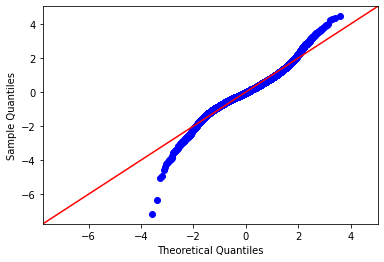

In [86]:
residuals = model_4.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )  
plt.savefig("model_4_plot.png")
plt.show;

In [87]:
X4 = sales_preds
y4 = sales_target

In [88]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [89]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.007968925224859862
Test Mean Squared Error: 0.007505337133360181


In [90]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X4, y4, cv=5, scoring=mse)
cv_5_results.mean()

3.1976644519253446e+17

**IMPORTANT:** After gathering results from Model 2, 3 and 4. I've noticed improvements in the R-squared values from the baseline model and started to improve in T-test values but cross validation results are not satisfactory and suggest overfitting models. This leads me to further analysis of the dataset before performing a new model.

<h2 align="center">Further Analysis</h2>

In [91]:
df_q = df.copy()

In [92]:
df_q

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter
0,1,2010-05-02,"1,643,690.90",0,42.31,2.57,211.10,8.11,17,5,2010,Q2
1,1,2010-12-02,"1,641,957.44",1,38.51,2.55,211.24,8.11,48,12,2010,Q4
2,1,2010-02-19,"1,611,968.17",0,39.93,2.51,211.29,8.11,7,2,2010,Q1
3,1,2010-02-26,"1,409,727.59",0,46.63,2.56,211.32,8.11,8,2,2010,Q1
4,1,2010-05-03,"1,554,806.68",0,46.50,2.62,211.35,8.11,18,5,2010,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,173.95",0,64.88,4.00,192.01,8.68,39,9,2012,Q3
6431,45,2012-05-10,"733,455.07",0,64.89,3.98,192.17,8.67,19,5,2012,Q2
6432,45,2012-12-10,"734,464.36",0,54.47,4,192.33,8.67,50,12,2012,Q4
6433,45,2012-10-19,"718,125.53",0,56.47,3.97,192.33,8.67,42,10,2012,Q4


In [93]:
# PREVIEW OF TOP STORES IN TERMS OF WEEKLY SALES

df_q.sort_values(by=["Weekly_Sales","Store"], ascending = False) 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter
1953,14,2011-11-25,"2,685,351.81",1,48.71,3.49,188.35,8.52,47,11,2011,Q4
2620,19,2010-12-24,"2,678,206.42",0,26.05,3.31,132.75,8.07,51,12,2010,Q4
185,2,2010-11-26,"2,658,725.29",1,62.98,2.73,211.41,8.16,47,11,2010,Q4
813,6,2011-12-23,"2,644,633.02",0,49.45,3.11,220.95,6.55,51,12,2011,Q4
3760,27,2010-11-26,"2,627,910.75",1,46.67,3.19,136.69,8.02,47,11,2010,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...
4671,33,2011-02-12,"220,060.35",0,59.12,3.70,129.85,8.01,6,2,2011,Q1
4623,33,2010-12-31,"219,804.85",1,52.91,3.15,127.09,9.27,52,12,2010,Q4
4675,33,2011-12-30,"215,359.21",1,51.60,3.43,130.07,8.01,52,12,2011,Q4
4614,33,2010-10-29,"213,538.32",0,71.34,3.13,126.44,9.27,43,10,2010,Q4


In [94]:
# SUM OF WEEKLY SALES BY STORES

stores = df_q.groupby('Store')['Weekly_Sales'].sum()
stores

Store
1    222,402,808.85
2    268,722,063.50
3     57,586,735.07
4    244,648,709.65
5     45,475,688.90
6    221,028,555.46
7     81,040,247.37
8    129,951,181.13
9     77,789,218.99
10   255,678,877.44
11   193,962,786.80
12    16,386,710.79
13   268,202,470.39
14   276,127,584.78
15    89,133,683.92
16    74,252,425.40
17   126,699,067.69
18   155,114,734.21
19   206,634,862.10
20   280,023,734.81
21   108,117,878.92
22   147,075,648.57
23        137248362
24   194,016,021.28
25   101,061,179.17
26   142,598,908.65
27   248,038,735.05
28    21,106,767.80
29    77,141,554.31
30    62,716,885.12
31   199,613,905.50
32   166,819,246.16
33    37,160,221.96
34        138249763
35   131,520,672.08
36    53,412,214.97
37    74,202,740.32
38     7,347,378.89
39   207,445,542.47
40    96,697,902.45
41   181,341,934.89
42    79,565,752.43
43    90,565,435.41
44    43,293,087.84
45   112,395,341.42
Name: Weekly_Sales, dtype: float64

In [95]:
# CREATING A NEW COLUMN WITH ALL THE TOTAL SALES BY STORE

df_q['Total'] = df_q['Weekly_Sales'].groupby(df_q['Store']).transform('sum')

In [97]:
# ORDERING DATA ASCENDING IN TERMS OF TOTAL COLUMN

df_q = df_q.sort_values(by=['Total'], ascending = False) 
df_q

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter,Total
2857,20,2012-12-10,"2,162,951.36",0,47.20,4,216.12,7.29,50,12,2012,Q4,"280,023,734.81"
2816,20,2011-12-30,2043245,1,36.35,3.39,212.40,7.08,52,12,2011,Q4,"280,023,734.81"
2807,20,2011-10-28,"2,065,421.52",0,49.36,3.57,210.69,7.08,43,10,2011,Q4,"280,023,734.81"
2808,20,2011-04-11,"2,284,106.60",0,43.88,3.55,210.84,7.08,15,4,2011,Q2,"280,023,734.81"
2809,20,2011-11-11,"2,269,975.85",0,47.27,3.53,210.98,7.08,45,11,2011,Q4,"280,023,734.81"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,2012-06-07,"471,086.22",0,89.13,3.77,130.72,10.90,23,6,2012,Q2,"7,347,378.89"
5431,38,2012-12-10,"437,320.66",0,71.74,4.47,131.11,10.20,50,12,2012,Q4,"7,347,378.89"
5432,38,2012-10-19,"428,806.46",0,68.66,4.45,131.15,10.20,42,10,2012,Q4,"7,347,378.89"
5433,38,2012-10-26,"417,290.38",0,65.95,4.30,131.19,10.20,43,10,2012,Q4,"7,347,378.89"


In [98]:
# ADDING TYPE OF STORES IN RELATION TO TOTAL COLUMN 

df_q['Store_type'] = pd.cut(df_q['Total'], bins=3, labels=('small', 'medium', 'large'))
df_q

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter,Total,Store_type
2857,20,2012-12-10,"2,162,951.36",0,47.20,4,216.12,7.29,50,12,2012,Q4,"280,023,734.81",large
2816,20,2011-12-30,2043245,1,36.35,3.39,212.40,7.08,52,12,2011,Q4,"280,023,734.81",large
2807,20,2011-10-28,"2,065,421.52",0,49.36,3.57,210.69,7.08,43,10,2011,Q4,"280,023,734.81",large
2808,20,2011-04-11,"2,284,106.60",0,43.88,3.55,210.84,7.08,15,4,2011,Q2,"280,023,734.81",large
2809,20,2011-11-11,"2,269,975.85",0,47.27,3.53,210.98,7.08,45,11,2011,Q4,"280,023,734.81",large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,2012-06-07,"471,086.22",0,89.13,3.77,130.72,10.90,23,6,2012,Q2,"7,347,378.89",small
5431,38,2012-12-10,"437,320.66",0,71.74,4.47,131.11,10.20,50,12,2012,Q4,"7,347,378.89",small
5432,38,2012-10-19,"428,806.46",0,68.66,4.45,131.15,10.20,42,10,2012,Q4,"7,347,378.89",small
5433,38,2012-10-26,"417,290.38",0,65.95,4.30,131.19,10.20,43,10,2012,Q4,"7,347,378.89",small


In [99]:

df_q.sort_values(by=["Weekly_Sales","Store"], ascending = False) 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Quarter,Total,Store_type
1953,14,2011-11-25,"2,685,351.81",1,48.71,3.49,188.35,8.52,47,11,2011,Q4,"276,127,584.78",large
2620,19,2010-12-24,"2,678,206.42",0,26.05,3.31,132.75,8.07,51,12,2010,Q4,"206,634,862.10",large
185,2,2010-11-26,"2,658,725.29",1,62.98,2.73,211.41,8.16,47,11,2010,Q4,"268,722,063.50",large
813,6,2011-12-23,"2,644,633.02",0,49.45,3.11,220.95,6.55,51,12,2011,Q4,"221,028,555.46",large
3760,27,2010-11-26,"2,627,910.75",1,46.67,3.19,136.69,8.02,47,11,2010,Q4,"248,038,735.05",large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,33,2011-02-12,"220,060.35",0,59.12,3.70,129.85,8.01,6,2,2011,Q1,"37,160,221.96",small
4623,33,2010-12-31,"219,804.85",1,52.91,3.15,127.09,9.27,52,12,2010,Q4,"37,160,221.96",small
4675,33,2011-12-30,"215,359.21",1,51.60,3.43,130.07,8.01,52,12,2011,Q4,"37,160,221.96",small
4614,33,2010-10-29,"213,538.32",0,71.34,3.13,126.44,9.27,43,10,2010,Q4,"37,160,221.96",small


In [100]:
# GROUPING BY QUARTER, STORE TYPE, YEAR INTERM OF WEEKLY SALES FOR BEST UNDERSTANDING OF WEEKLY SALES

df_q.groupby(['Quarter', 'Store_type'])['Weekly_Sales'].describe()

count         mean        std          min          25%  \
Quarter Store_type                                                            
Q1      small         486   484,045.07 159,228.97   209,986.25   367,819.65   
        medium        416   931,800.51 197,582.81   540,922.94   786,004.20   
        large         461 1,655,897.49 312,866.43 1,057,290.41 1,379,473.03   
Q2      small         577   495,059.56 169,885.86   234,218.03   369,350.60   
        medium        494   973,090.14 196,028.14   596,218.24   814,046.84   
        large         544 1,696,227.06 303,212.52 1,194,334.65 1,422,773.59   
Q3      small         588   507,347.77 192,148.00   224,031.19   367,167.22   
        medium        481   960,509.55 208,877.79   558,794.63   802,583.89   
        large         522 1,654,245.53 289,681.24 1,169,413.27 1,391,943.32   
Q4      small         501   530,257.27 218,226.15   213,538.32   389,540.62   
        medium        422 1,061,263.70 316,811.67   576,332.05   847,406.27   
        large         425 1,733,915.83 347,651.96 1,169,831.38 1,425,078.59   

                            50%          75%          max  
Quarter Store_type                                         
Q1      small        486,527.82   561,206.07 1,376,520.10  
        medium       912,004.09 1,065,870.84 1,617,025.41  
        large      1,632,616.09 1,910,092.37 2,495,630.51  
Q2      small        492,364.77   573,498.64 1,500,863.54  
        medium       964,040.24 1,100,453.11 1,571,158.56  
        large      1,654,382.89 1,945,633.90 2,623,469.95  
Q3      small        501,098.52   583,112.69 1,469,693.99  
        medium       937,420.65 1,095,889.22 1,841,173.60  
        large      1,614,016.62 1,886,116.50 2,546,123.78  
Q4      small        509,647.25   598,437.98 1,648,829.18  
        medium       997,685.55 1,184,727.22 2,587,953.32  
        large      1,707,298.14 1,984,768.34 2,685,351.81

In [101]:
df_q.drop(columns= ['Date', 'Week', 'Month', 'Year'], inplace=True)

In [102]:
# ADDING DUMMIES FOR STORE TYPE AND QUARTER

df_q = pd.get_dummies(df_q, columns=['Store_type', 'Quarter'])
df_q

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Total,Store_type_small,Store_type_medium,Store_type_large,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
2857,20,"2,162,951.36",0,47.20,4,216.12,7.29,"280,023,734.81",0,0,1,0,0,0,1
2816,20,2043245,1,36.35,3.39,212.40,7.08,"280,023,734.81",0,0,1,0,0,0,1
2807,20,"2,065,421.52",0,49.36,3.57,210.69,7.08,"280,023,734.81",0,0,1,0,0,0,1
2808,20,"2,284,106.60",0,43.88,3.55,210.84,7.08,"280,023,734.81",0,0,1,0,1,0,0
2809,20,"2,269,975.85",0,47.27,3.53,210.98,7.08,"280,023,734.81",0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,"471,086.22",0,89.13,3.77,130.72,10.90,"7,347,378.89",1,0,0,0,1,0,0
5431,38,"437,320.66",0,71.74,4.47,131.11,10.20,"7,347,378.89",1,0,0,0,0,0,1
5432,38,"428,806.46",0,68.66,4.45,131.15,10.20,"7,347,378.89",1,0,0,0,0,0,1
5433,38,"417,290.38",0,65.95,4.30,131.19,10.20,"7,347,378.89",1,0,0,0,0,0,1


<h2 align="center">Model_q 1</h2>


In [103]:
# MODEL_Q 1

outcome = 'Weekly_Sales'
x_cols =  ['Store_type_small', 'Store_type_medium', 'Store_type_large',
          'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Quarter_Q1', 'Quarter_Q2',
          'Quarter_Q3', 'Quarter_Q4']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_q1 = ols(formula=formula, data=df_q).fit()


model_q1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     2542.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:40   Log-Likelihood:                -81689.
No. Observations:                5917   AIC:                         1.634e+05
Df Residuals:                    5906   BIC:                         1.635e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.016e+06   2.51e+04     40.415      0.000    9.66e+05    1.06e+06
Store_type_small  -2.038e+05   9641.020    -21.135      0.000   -2.23e+05   -1.85e+05
Store_type_medium  2.447e+05   9271.194     26.397      0.000    2.27e+05    2.63e+05
Store_type_large   9.746e+05   9611.604    101.395      0.000    9.56e+05    9.93e+05
Holiday_Flag       1.564e+04   1.34e+04      1.167      0.243   -1.06e+04    4.19e+04
Temperature       -1521.6218    202.118     -7.528      0.000   -1917.847   -1125.397
Fuel_Price        -1.321e+04   7126.457     -1.854      0.064   -2.72e+04     759.012
CPI               -1350.8846     86.949    -15.537      0.000   -1521.336   -1180.433
Unemployment      -2.347e+04   2621.905     -8.950      0.000   -2.86e+04   -1.83e+04
Quarter_Q1         2.108e+05   8363.896     25.200      0.000    1.94e+05    2.27e+05
Quarter_Q2         2.582e+05   8560.723     30.155      0.000    2.41e+05    2.75e+05
Quarter_Q3         2.562e+05   8674.346     29.532      0.000    2.39e+05    2.73e+05
Quarter_Q4         2.904e+05   8540.209     34.009      0.000    2.74e+05    3.07e+05
==============================================================================
Omnibus:                      508.863   Durbin-Watson:                   0.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.483
Skew:                           0.661   Prob(JB):                    7.39e-171
Kurtosis:                       4.196   Cond. No.                     8.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.08e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

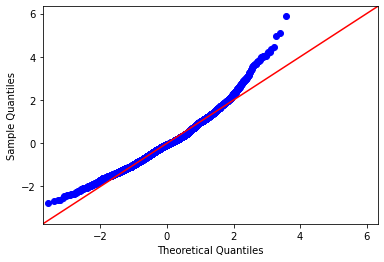

In [104]:
residuals = model_q1.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [105]:
#SELECTING 'X' AND 'Y' VALUES FOR TRAIN-TEST SPLIT
X_q1 = df_q.drop('Weekly_Sales', axis=1)
y_q1 = df_q['Weekly_Sales']

df_q

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Total,Store_type_small,Store_type_medium,Store_type_large,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
2857,20,"2,162,951.36",0,47.20,4,216.12,7.29,"280,023,734.81",0,0,1,0,0,0,1
2816,20,2043245,1,36.35,3.39,212.40,7.08,"280,023,734.81",0,0,1,0,0,0,1
2807,20,"2,065,421.52",0,49.36,3.57,210.69,7.08,"280,023,734.81",0,0,1,0,0,0,1
2808,20,"2,284,106.60",0,43.88,3.55,210.84,7.08,"280,023,734.81",0,0,1,0,1,0,0
2809,20,"2,269,975.85",0,47.27,3.53,210.98,7.08,"280,023,734.81",0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,"471,086.22",0,89.13,3.77,130.72,10.90,"7,347,378.89",1,0,0,0,1,0,0
5431,38,"437,320.66",0,71.74,4.47,131.11,10.20,"7,347,378.89",1,0,0,0,0,0,1
5432,38,"428,806.46",0,68.66,4.45,131.15,10.20,"7,347,378.89",1,0,0,0,0,0,1
5433,38,"417,290.38",0,65.95,4.30,131.19,10.20,"7,347,378.89",1,0,0,0,0,0,1


In [106]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X_q1, y_q1, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [107]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 27642244427.4071
Test Mean Squared Error: 29620234931.496185


In [108]:
# CROSS VALIDATION RESULTS 
mse1 = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X_q1, y_q1, cv=5, scoring=mse)
cv_5_results.mean()

34951419933.664635

**IMPORTANT:** R-squared value is looking promising and linear regression present, but I still need some data transformation methods to improve the T-test and Cross validation scores.

<h2 align="center">Logarithmic Transformation</h2> 

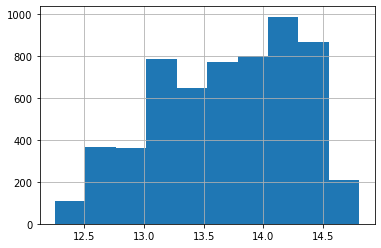

In [152]:
# PLOTING WEEKLY SALES BEFORE LOG TRANSFORMATION
df_q['Weekly_Sales'].hist();

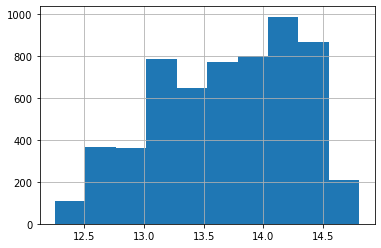

In [109]:
# LOG TRANSFORMATION FOR WEEKLY SALES, TEMPERATURE, FUEL PRICE, CPI, UNEMPLOYMENT

df_q['Weekly_Sales'] = np.log(df_q['Weekly_Sales'])
df_q['Temperature'] = np.log(df_q['Temperature'])
df_q['Fuel_Price'] = np.log(df_q['Fuel_Price'])
df_q['CPI'] = np.log(df_q['CPI'])
df_q['Unemployment'] = np.log(df_q['Unemployment'])



df_q['Weekly_Sales'].hist();

In [110]:
df_q

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Total,Store_type_small,Store_type_medium,Store_type_large,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
2857,20,14.59,0,3.85,1.39,5.38,1.99,"280,023,734.81",0,0,1,0,0,0,1
2816,20,14.53,1,3.59,1.22,5.36,1.96,"280,023,734.81",0,0,1,0,0,0,1
2807,20,14.54,0,3.90,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1
2808,20,14.64,0,3.78,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,1,0,0
2809,20,14.64,0,3.86,1.26,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,13.06,0,4.49,1.33,4.87,2.39,"7,347,378.89",1,0,0,0,1,0,0
5431,38,12.99,0,4.27,1.50,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1
5432,38,12.97,0,4.23,1.49,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1
5433,38,12.94,0,4.19,1.46,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1


<h2 align="center">Model_q 2</h2> 

In [111]:
# MODEL_Q2

outcome = 'Weekly_Sales'
x_cols =  ['Store_type_small', 'Store_type_medium', 'Store_type_large',
          'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Quarter_Q1', 'Quarter_Q2',
          'Quarter_Q3', 'Quarter_Q4']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_q2 = ols(formula=formula, data=df_q).fit()


model_q2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2441.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:54:40   Log-Likelihood:                -394.77
No. Observations:                5917   AIC:                             811.5
Df Residuals:                    5906   BIC:                             885.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5771      0.067    142.183      0.000       9.445       9.709
Store_type_small      2.5498      0.023    109.774      0.000       2.504       2.595
Store_type_medium     3.2244      0.022    144.081      0.000       3.181       3.268
Store_type_large      3.8029      0.023    163.276      0.000       3.757       3.849
Holiday_Flag          0.0019      0.015      0.132      0.895      -0.027       0.030
Temperature          -0.1126      0.011    -10.471      0.000      -0.134      -0.091
Fuel_Price            0.0043      0.025      0.170      0.865      -0.045       0.054
CPI                  -0.1524      0.016     -9.753      0.000      -0.183      -0.122
Unemployment         -0.1048      0.021     -5.058      0.000      -0.145      -0.064
Quarter_Q1            2.3464      0.018    133.065      0.000       2.312       2.381
Quarter_Q2            2.3993      0.018    132.611      0.000       2.364       2.435
Quarter_Q3            2.4075      0.018    131.864      0.000       2.372       2.443
Quarter_Q4            2.4239      0.018    136.255      0.000       2.389       2.459
==============================================================================
Omnibus:                      105.088   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.781
Skew:                          -0.016   Prob(JB):                     3.78e-47
Kurtosis:                       3.931   Cond. No.                     7.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

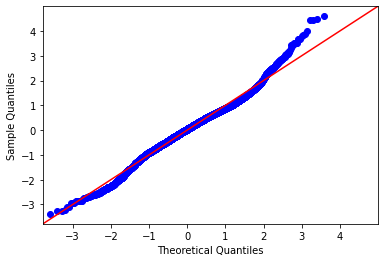

In [112]:
residuals = model_q2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [113]:
# SELECTING 'X' AND 'Y' VALUES FOR TRAIN-TEST SPLIT

X_q2 = df_q.drop('Weekly_Sales', axis=1)
y_q2 = df_q['Weekly_Sales']

df_q

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Total,Store_type_small,Store_type_medium,Store_type_large,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
2857,20,14.59,0,3.85,1.39,5.38,1.99,"280,023,734.81",0,0,1,0,0,0,1
2816,20,14.53,1,3.59,1.22,5.36,1.96,"280,023,734.81",0,0,1,0,0,0,1
2807,20,14.54,0,3.90,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1
2808,20,14.64,0,3.78,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,1,0,0
2809,20,14.64,0,3.86,1.26,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,13.06,0,4.49,1.33,4.87,2.39,"7,347,378.89",1,0,0,0,1,0,0
5431,38,12.99,0,4.27,1.50,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1
5432,38,12.97,0,4.23,1.49,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1
5433,38,12.94,0,4.19,1.46,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1


In [114]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X_q2, y_q2, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [115]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.037703690737580675
Test Mean Squared Error: 0.03874646866634279


In [116]:
# CROSS VALIDATION RESULTS 
mse2 = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X_q2, y_q2, cv=5, scoring=mse)
cv_5_results.mean()

0.08744642305294413

**IMPORTANT:** Even though I've obtainied a lower R-squared value from Model_q1 to Model_q2 we can say that we have a good model and with Cross validation satisfactory.

In [118]:
# ADDING DUMMIES FOR HOLIDAY FLAG
df_q = pd.get_dummies(df_q, columns=['Holiday_Flag'])
df_q

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Total,Store_type_small,Store_type_medium,Store_type_large,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Holiday_Flag_0,Holiday_Flag_1
2857,20,14.59,3.85,1.39,5.38,1.99,"280,023,734.81",0,0,1,0,0,0,1,1,0
2816,20,14.53,3.59,1.22,5.36,1.96,"280,023,734.81",0,0,1,0,0,0,1,0,1
2807,20,14.54,3.90,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1,1,0
2808,20,14.64,3.78,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,1,0,0,1,0
2809,20,14.64,3.86,1.26,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,13.06,4.49,1.33,4.87,2.39,"7,347,378.89",1,0,0,0,1,0,0,1,0
5431,38,12.99,4.27,1.50,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1,1,0
5432,38,12.97,4.23,1.49,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1,1,0
5433,38,12.94,4.19,1.46,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1,1,0


<h2 align="center">Model_q 3</h2> 

In [134]:
outcome = 'Weekly_Sales'
x_cols =  ['Store_type_small', 'Store_type_medium', 'Store_type_large',
          'Holiday_Flag_0', 'Holiday_Flag_1','Temperature', 'Fuel_Price',
           'CPI', 'Unemployment', 'Quarter_Q1', 'Quarter_Q2',
          'Quarter_Q3', 'Quarter_Q4']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_q3 = ols(formula=formula, data=df_q).fit()


model_q3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2441.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:16:24   Log-Likelihood:                -394.77
No. Observations:                5917   AIC:                             811.5
Df Residuals:                    5906   BIC:                             885.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.2791      0.051    142.298      0.000       7.179       7.379
Store_type_small      1.7838      0.018     99.278      0.000       1.749       1.819
Store_type_medium     2.4584      0.017    143.228      0.000       2.425       2.492
Store_type_large      3.0369      0.018    168.384      0.000       3.001       3.072
Holiday_Flag_0        3.6386      0.026    137.701      0.000       3.587       3.690
Holiday_Flag_1        3.6405      0.027    136.110      0.000       3.588       3.693
Temperature          -0.1126      0.011    -10.471      0.000      -0.134      -0.091
Fuel_Price            0.0043      0.025      0.170      0.865      -0.045       0.054
CPI                  -0.1524      0.016     -9.753      0.000      -0.183      -0.122
Unemployment         -0.1048      0.021     -5.058      0.000      -0.145      -0.064
Quarter_Q1            1.7719      0.014    126.485      0.000       1.744       1.799
Quarter_Q2            1.8248      0.014    126.958      0.000       1.797       1.853
Quarter_Q3            1.8329      0.014    126.421      0.000       1.805       1.861
Quarter_Q4            1.8494      0.014    132.452      0.000       1.822       1.877
==============================================================================
Omnibus:                      105.088   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.781
Skew:                          -0.016   Prob(JB):                     3.78e-47
Kurtosis:                       3.931   Cond. No.                     1.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.68e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

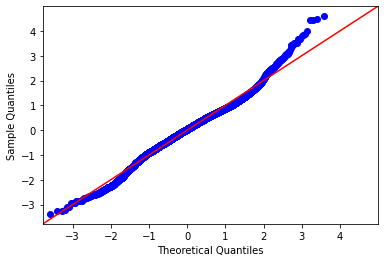

In [133]:
residuals = model_q3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [135]:
# SELECTING 'X' AND 'Y' VALUES FROM 'DATA_LOG' FOR TRAIN-TEST SPLIT
X_q3 = df_q.drop('Weekly_Sales', axis=1)
y_q3 = df_q['Weekly_Sales']

df_q

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Total,Store_type_small,Store_type_medium,Store_type_large,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Holiday_Flag_0,Holiday_Flag_1
2857,20,14.59,3.85,1.39,5.38,1.99,"280,023,734.81",0,0,1,0,0,0,1,1,0
2816,20,14.53,3.59,1.22,5.36,1.96,"280,023,734.81",0,0,1,0,0,0,1,0,1
2807,20,14.54,3.90,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1,1,0
2808,20,14.64,3.78,1.27,5.35,1.96,"280,023,734.81",0,0,1,0,1,0,0,1,0
2809,20,14.64,3.86,1.26,5.35,1.96,"280,023,734.81",0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,38,13.06,4.49,1.33,4.87,2.39,"7,347,378.89",1,0,0,0,1,0,0,1,0
5431,38,12.99,4.27,1.50,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1,1,0
5432,38,12.97,4.23,1.49,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1,1,0
5433,38,12.94,4.19,1.46,4.88,2.32,"7,347,378.89",1,0,0,0,0,0,1,1,0


In [137]:
# TRAIN-TEST SPLIT0

X_train, X_test, y_train, y_test = train_test_split(X_q3, y_q3, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4733 1184 4733 1184


In [138]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.03770369073758067
Test Mean Squared Error: 0.038746468669303244


In [139]:
# CROSS VALIDATION RESULTS 
mse3 = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X_q3, y_q3, cv=5, scoring=mse)
cv_5_results.mean()

0.08744642288256332

**IMPORTANT:** Even though we're obtaining the same R-squared value from Model_q2 and Model_q3, we can say that now we have a model that we can use since the results in T-test and Cross validation are satisfactory.